In [1]:
%matplotlib notebook
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
#from google.colab import files

In [2]:
# Read Google sheet as csv file and view a few rows of the data

gsheetid = '14tBlQsaRgisY6pmNITW6lTF26iuZ0TN3ko9vDea8Blc'

sheet_name = 'Sheet1'

gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheetid, sheet_name)

df = pd.read_csv(gsheet_url)

df.head()

,Parcel_ID,Street1,Street2,City,St,Contractor_Name,PermitNum,Type,SubType,Primary_Contact
0,18-1-244,5 SMITH ST,UNIT 1,ROCKPORT,MA,Robert O'Keefe,20231179.0,Construction,Electrical,NaN
1,18-1-272,4 NORWOOD CT UNIT 1,NaN,ROCKPORT,MA,Robert O'Keefe,20231178.0,Construction,Electrical,NaN
2,18-1-271,6 NORWOOD CT,NaN,ROCKPORT,MA,Ken Szymansky,20231176.0,Construction,General Contractor,NaN
3,18-1-269,11 FOREST ST,NaN,NaN,MA,Justin J Rancatore,20231175.0,Construction,Electrical,NaN
4,18-7-199,7 GRANITE ST,NaN,NaN,MA,Crisp Contracting,20231174.0,Construction,NaN,NaN


In [3]:
# To save Google Sheet as a CSV file into local PC from Jupyter Notebook

# df.to_csv('Awishcar.csv')

In [4]:
# To save Google Sheet as a CSV file into local PC from Google Colab

# df.to_csv('Awishcar.csv')

# files.download('Awishcar.csv')


In [5]:
# Use the info() function to check the number of rows, number of columns, column names, number of null
# values and data types of all the columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parcel_ID        99 non-null     object 
 1   Street1          82 non-null     object 
 2   Street2          2 non-null      object 
 3   City             81 non-null     object 
 4   St               83 non-null     object 
 5   Contractor_Name  88 non-null     object 
 6   PermitNum        71 non-null     float64
 7   Type             99 non-null     object 
 8   SubType          93 non-null     object 
 9   Primary_Contact  43 non-null     object 
dtypes: float64(1), object(9)
memory usage: 7.9+ KB


In [6]:
# The isnull().sum() function will give us the sum of all Null or NAN or Missing values column-wise

df.isnull().sum()

Parcel_ID           0
Street1            17
Street2            97
City               18
St                 16
Contractor_Name    11
PermitNum          28
Type                0
SubType             6
Primary_Contact    56
dtype: int64

##  Parcel ID

**The data in Parcel ID is changed to Date**

**We assume that the parcel ID is a continuous alphanumeric number.**

1. Write a function to convert the month name into the month number.
2. By assuming parcel ID as a continuous alphanumeric number remove the hyphen and get a continuous alphanumeric number as a Parcel Number.

In [7]:
df['Parcel_ID'].str.split('-')[:30]

0       [18, 1, 244]
1       [18, 1, 272]
2       [18, 1, 271]
3       [18, 1, 269]
4       [18, 7, 199]
5        [35, 1, 38]
6        [36, B, 30]
7       [18, 1, 512]
8     [22, 01, 1934]
9     [21, 01, 2010]
10         [15, Feb]
11         [15, Mar]
12         [15, 125]
13         [15, 124]
14         [15, 132]
15         [15, 134]
16         [15, 117]
17          [15, 94]
18         [15, 137]
19         [15, 139]
20         [01, Nov]
21         [Aug, 37]
22          [15, 99]
23        [15, 138A]
24           [1, 9B]
25          [1, 11A]
26         [Jan, 17]
27         [Jan, 13]
28          [8, 51F]
29         [15, 13B]
Name: Parcel_ID, dtype: object

In [8]:
def parcel_ID(x):
    
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

    for m in range(len(x)):
        for i, month in enumerate(months, 1):
            if x[m] == month:
                x[m] = str(i).zfill(2)
    
    return x   

df['Parcel_ID'] = df['Parcel_ID'].str.split('-').apply(parcel_ID).str.join('')

df['Parcel_ID'][:30]  

0       181244
1       181272
2       181271
3       181269
4       187199
5        35138
6        36B30
7       181512
8     22011934
9     21012010
10        1502
11        1503
12       15125
13       15124
14       15132
15       15134
16       15117
17        1594
18       15137
19       15139
20        0111
21        0837
22        1599
23      15138A
24         19B
25        111A
26        0117
27        0113
28        851F
29       1513B
Name: Parcel_ID, dtype: object

##  Location

The Location column has to be created using 4 columns Street1, Street2, City and St.

1. Replace NAN values with a blank in all 4 columns.
2. Use title() function to make 1st letter of the word as CAPITAL.
3. Join all 4 columns and name the new column as Location.
4. Among Stree1, City and St, if any one of them is missing then replace the Location with -1
5. Delete all 4 columns as we no longer need them.


In [9]:
# Replace NAN in street1 column by blank space

df['Street1'] = df['Street1'].replace(np.nan, '')

df['Street1'] = df['Street1'].str.title()



# Replace NAN in street2 column by blank space

df['Street2'] = df['Street2'].replace(np.nan, '')

df['Street2'] = df['Street2'].str.title()


# Replace NAN in City column by blank space

df['City'] = df['City'].replace(np.nan, '')

df['City'] = df['City'].str.title()


# Replace NAN in St column by blank space

df['St'] = df['St'].replace(np.nan, '')


# Join all 4 columns to create a single Location

df['Location'] = (df['Street1'].astype(str) + df['Street2'].astype(str) + ', ' + 
                  df['City'].astype(str) + ', ' +  df['St'].astype(str))

# Among Stree1, City and St, if any one of them is missing then replace the Location with -1.

df['Location'] = df['Location'].replace(r', , ', -1, regex= True)

df['Location'] = df['Location'].replace(r'^,\s\w+,\s\w+$', -1, regex= True)

df['Location'][60:75]

60         2 Edgemere Rd, Rockport, MA
61          10 Curtis St, Rockport, MA
62        169 Granite St, Rockport, MA
63     167 Granite St #4, Rockport, MA
64           4 Curtis St, Rockport, MA
65           2 Curtis St, Rockport, MA
66          1 Hunters Ct, Rockport, MA
67        126 Granite St, Rockport, MA
68        161 Granite St, Rockport, MA
69        124 Granite St, Rockport, MA
70        122 Granite St, Rockport, MA
71                                  -1
72        143 Granite St, Rockport, MA
73     27 Pigeon Hill St, Rockport, MA
74    37A Pigeon Hill St, Rockport, MA
Name: Location, dtype: object

In [10]:
# Delete all 4 columns as we no longer need them

del df['Street1']
del df['Street2']
del df['City']
del df['St']

In [11]:
df.head()

,Parcel_ID,Contractor_Name,PermitNum,Type,SubType,Primary_Contact,Location
0,181244,Robert O'Keefe,20231179.0,Construction,Electrical,NaN,"5 Smith St Unit 1, Rockport, MA"
1,181272,Robert O'Keefe,20231178.0,Construction,Electrical,NaN,"4 Norwood Ct Unit 1, Rockport, MA"
2,181271,Ken Szymansky,20231176.0,Construction,General Contractor,NaN,"6 Norwood Ct, Rockport, MA"
3,181269,Justin J Rancatore,20231175.0,Construction,Electrical,NaN,-1
4,187199,Crisp Contracting,20231174.0,Construction,NaN,NaN,-1


##  Contractor_Name

1. Use ReGex to remove irregular spaces between the names.
2. Replace missing values with -1.

In [12]:
# This function will remove any number of irregular spaces between any number of words.

df['Contractor_Name'] = df['Contractor_Name'].replace(r'\s+', ' ', regex=True)

df['Contractor_Name'] = df['Contractor_Name'].replace(np.nan, -1)

## Type and SubType

1. Create a Type ID column for Type using the Pandas factorize() function.
2. Create a SubType ID column for SubType using the Pandas factorize() function.
3. If NAN is present in Type or SubType then it will be represented as -1 in Type ID or SubType ID.
4. Check for unique IDs in Type and SubType.


In [13]:
# Creating unique ID's for Type.

# If Nan is present then it will be represent as -1.

df['Type_ID'] = pd.factorize(df['Type'])[0]

# Since pd.factorize starts numbering from 0, we can add 1 to starts numbering from 1

def ID(x):
    if x != -1:
        x = x + 1
    return x

df['Type_ID'] = df['Type_ID'].apply(ID)

# Once Type_ID is created we will also replace nan in Type to -1.

df['Type'] = df['Type'].replace(np.nan, -1)

# Creating unique ID's for SubType.

# If Nan is present then it will be represented as -1.

df['SubType_ID'] = pd.factorize(df['SubType'])[0]

# Since pd.factorize starts numbering from 0, we can add 1 to starts numbering from 1

df['SubType_ID'] = df['SubType_ID'].apply(ID)

# Once SubType_ID is created we will also replace nan in SubType to -1

df['SubType'] = df['SubType'].replace(np.nan, -1)

In [14]:
# Here type has only 1 category. So 1 unique Id

print(df['Type'].unique())

print(df['Type_ID'].unique())

['Construction']
[1]


In [15]:
# SubType has 6 categories and NAN. SO 0 to 5 ID's for sub type and -1 for NAN

print(df['SubType'].unique())

print(df['SubType_ID'].unique())

['Electrical' 'General Contractor' -1 'Plumbing' 'Septic Designer' 'Gas'
 'Well']
[ 1  2 -1  3  4  5  6]


In [16]:
df.head()

,Parcel_ID,Contractor_Name,PermitNum,Type,SubType,Primary_Contact,Location,Type_ID,SubType_ID
0,181244,Robert O'Keefe,20231179.0,Construction,Electrical,NaN,"5 Smith St Unit 1, Rockport, MA",1,1
1,181272,Robert O'Keefe,20231178.0,Construction,Electrical,NaN,"4 Norwood Ct Unit 1, Rockport, MA",1,1
2,181271,Ken Szymansky,20231176.0,Construction,General Contractor,NaN,"6 Norwood Ct, Rockport, MA",1,2
3,181269,Justin J Rancatore,20231175.0,Construction,Electrical,NaN,-1,1,1
4,187199,Crisp Contracting,20231174.0,Construction,-1,NaN,-1,1,-1


## Primary_Contact

1. Replace NAN in Primary_Contact with -1.
2. Write a function to get the First Name from Primary_Contact and make it a new column.
3. Write a function to get the Last Name from Primary_Contact and make it a new column.
4. Delete Primary_Contact as we no longer need it.

In [17]:
# We can see that Primary_Contact column has many missing values. SO at first we need to replace 
# missing values with -1 using pandas fillna() function

df['Primary_Contact'].fillna(-1, inplace=True)

# Now we will write function to extraxt First_Name from Primary_Contact

def First_Name(x):
    
    if x == -1:
        return -1
    else:
        return x.split()[0]
    

df['First_Name'] = df['Primary_Contact'].apply(First_Name)

In [18]:
# Now we will write function to extraxt Last_Name from Primary_Contact


def Last_Name(x):
    
    if x == -1:
        return -1
    elif x.split()[-1] == 'Jr':
        return x.split()[-2].strip(',')
    else:
        return x.split()[-1]
    
df['Last_Name'] = df['Primary_Contact'].apply(Last_Name)

In [19]:
# Now we will delete Primary_Contact as we no longer need it

del df['Primary_Contact']

## PermitNum

1. Replace missing values with -1.

In [20]:
# Replace NAN with -1

df['PermitNum'].fillna(-1, inplace=True)

df['PermitNum'] = df['PermitNum'].astype(int)

In [21]:
# Make sure that no NAN or Null or Missing value left in the Data.

df.isnull().sum()    

Parcel_ID          0
Contractor_Name    0
PermitNum          0
Type               0
SubType            0
Location           0
Type_ID            0
SubType_ID         0
First_Name         0
Last_Name          0
dtype: int64

In [22]:
# Take a final view of the data

df.head()

,Parcel_ID,Contractor_Name,PermitNum,Type,SubType,Location,Type_ID,SubType_ID,First_Name,Last_Name
0,181244,Robert O'Keefe,20231179,Construction,Electrical,"5 Smith St Unit 1, Rockport, MA",1,1,-1,-1
1,181272,Robert O'Keefe,20231178,Construction,Electrical,"4 Norwood Ct Unit 1, Rockport, MA",1,1,-1,-1
2,181271,Ken Szymansky,20231176,Construction,General Contractor,"6 Norwood Ct, Rockport, MA",1,2,-1,-1
3,181269,Justin J Rancatore,20231175,Construction,Electrical,-1,1,1,-1,-1
4,187199,Crisp Contracting,20231174,Construction,-1,-1,1,-1,-1,-1


In [23]:
# Rename the columns

df.rename(columns={'PermitNum':'Permit',
                    'Parcel_ID':'Parcel Number',
                   'Contractor_Name':'Bussiness Name',
                    'Type_ID':'B Type ID',
                  'SubType_ID':'B Use ID',
                  'First_Name':"Applicant First Name",
                  'Last_Name':"Applicant Last Name"}, inplace=True)

In [24]:
# Get all the columns as per sequence

Data = df[['Permit','Parcel Number','Location','Bussiness Name','B Type ID','B Use ID','Applicant First Name', 'Applicant Last Name']]

Data.set_index('Permit', inplace=True)

Data

,Parcel Number,Location,Bussiness Name,B Type ID,B Use ID,Applicant First Name,Applicant Last Name
Permit,,,,,,,
20231179,181244,"5 Smith St Unit 1, Rockport, MA",Robert O'Keefe,1,1,-1,-1
20231178,181272,"4 Norwood Ct Unit 1, Rockport, MA",Robert O'Keefe,1,1,-1,-1
20231176,181271,"6 Norwood Ct, Rockport, MA",Ken Szymansky,1,2,-1,-1
20231175,181269,-1,Justin J Rancatore,1,1,-1,-1
20231174,187199,-1,Crisp Contracting,1,-1,-1,-1
...,...,...,...,...,...,...,...
20231091,1743,"30 Cary Ave, Lexington, MA",Heritage Plumbing & Heating,1,1,-1,-1
20231091,1746,"49 Granite St, Rockport, MA",Heritage Plumbing & Heating,1,1,-1,-1
20231090,1745,"60 Beach St, Rockport, MA",Heritage Plumbing & Heating,1,1,-1,-1


In [27]:
# Finally to represent Missing Data Graphically, let us replace -1 with NAN in new DataFrame.

df2 = Data.replace(-1, np.nan)

In [28]:
df2

,Parcel Number,Location,Bussiness Name,B Type ID,B Use ID,Applicant First Name,Applicant Last Name
Permit,,,,,,,
20231179,181244,"5 Smith St Unit 1, Rockport, MA",Robert O'Keefe,1,1.0,NaN,NaN
20231178,181272,"4 Norwood Ct Unit 1, Rockport, MA",Robert O'Keefe,1,1.0,NaN,NaN
20231176,181271,"6 Norwood Ct, Rockport, MA",Ken Szymansky,1,2.0,NaN,NaN
20231175,181269,NaN,Justin J Rancatore,1,1.0,NaN,NaN
20231174,187199,NaN,Crisp Contracting,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
20231091,1743,"30 Cary Ave, Lexington, MA",Heritage Plumbing & Heating,1,1.0,NaN,NaN
20231091,1746,"49 Granite St, Rockport, MA",Heritage Plumbing & Heating,1,1.0,NaN,NaN
20231090,1745,"60 Beach St, Rockport, MA",Heritage Plumbing & Heating,1,1.0,NaN,NaN


<IPython.core.display.Javascript object>


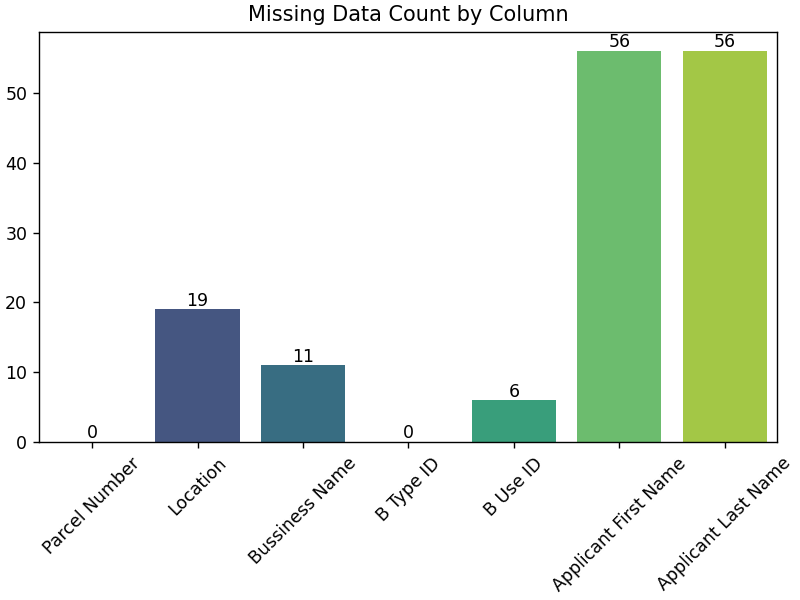

In [32]:
# Bar Plot for Missing Data

# Calculate the total count of missing data for each column
missing_count = df2.isnull().sum()

plt.figure(constrained_layout=True)
ax = sns.barplot(x=missing_count.index, y=missing_count.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Missing Data Count by Column')

# Annotate the bars with the missing count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.savefig('Bar.png')
plt.show()

<IPython.core.display.Javascript object>


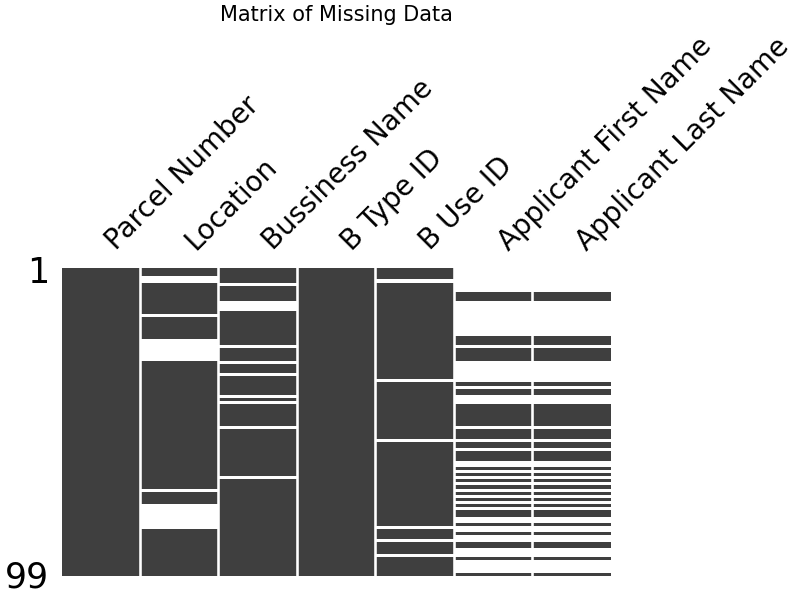

In [38]:
# Matrix representation for Missing Data 

plt.figure(constrained_layout=True)
ax = plt.gca()  # Get the current axis
msno.matrix(df2, ax=ax, sparkline=False)
plt.title('Matrix of Missing Data')
plt.savefig('Matrix.png')
plt.show()


<IPython.core.display.Javascript object>


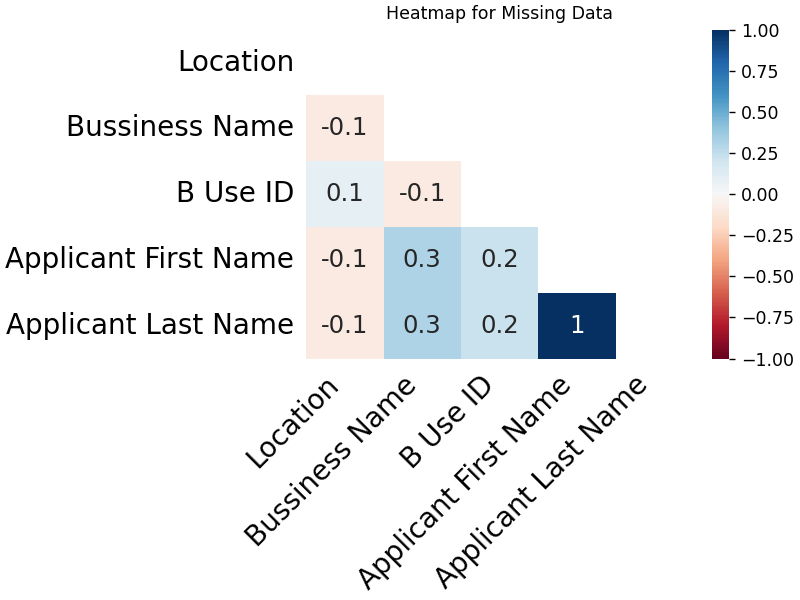

In [39]:
# Heatmap for Missing Data

plt.figure(constrained_layout=True)
ax = plt.gca()  # Get the current axis
msno.heatmap(df2, ax=ax)
plt.title('Heatmap for Missing Data', fontsize=10)
plt.savefig('Heatmap.png')
plt.show()


In [42]:
# Download the Cleaned CSV file to local computer for Jupyter Notebook

# Data.to_csv('Awishcar_Final.csv')

In [43]:
# Download the Cleaned CSV file to local computer for Google Colab

# Data.to_csv('Awishcar_Final.csv')

# files.download('Awishcar_Final.csv') 